In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import joblib 
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


In [13]:
data = pd.read_csv('housing_all_encoded.csv')
data = data.drop(columns= 'Unnamed: 0')

In [14]:
data.head()

,year,floor_area_sqm,range_numeric,lease_commence_date,remaining_lease,resale_price,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,district_East,district_North,district_North-East,district_West
0,1990,-2.506989,0.680780,1977,0.463430,9000.0,False,False,False,False,False,False,False,False,True,False
1,1990,-2.506989,-0.558727,1977,0.463430,6000.0,False,False,False,False,False,False,False,False,True,False
2,1990,-2.506989,0.680780,1977,0.463430,8000.0,False,False,False,False,False,False,False,False,True,False
3,1990,-2.506989,0.061026,1977,0.463430,6000.0,False,False,False,False,False,False,False,False,True,False
4,1990,-0.879230,-0.558727,1976,0.371238,47200.0,False,True,False,False,False,False,False,False,True,False


In [15]:
#splitting Data into training and testing

X = data.drop('resale_price', axis=1)
y = data['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X.head()

,year,floor_area_sqm,range_numeric,lease_commence_date,remaining_lease,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,district_East,district_North,district_North-East,district_West
0,1990,-2.506989,0.680780,1977,0.463430,False,False,False,False,False,False,False,False,True,False
1,1990,-2.506989,-0.558727,1977,0.463430,False,False,False,False,False,False,False,False,True,False
2,1990,-2.506989,0.680780,1977,0.463430,False,False,False,False,False,False,False,False,True,False
3,1990,-2.506989,0.061026,1977,0.463430,False,False,False,False,False,False,False,False,True,False
4,1990,-0.879230,-0.558727,1976,0.371238,False,True,False,False,False,False,False,False,True,False


In [33]:
X.columns

Index(['year', 'floor_area_sqm', 'range_numeric', 'lease_commence_date',
       'remaining_lease', 'flat_type_2 ROOM', 'flat_type_3 ROOM',
       'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE',
       'flat_type_MULTI-GENERATION', 'district_East', 'district_North',
       'district_North-East', 'district_West'],
      dtype='object')

In [17]:
y.head()


0     9000.0
1     6000.0
2     8000.0
3     6000.0
4    47200.0
Name: resale_price, dtype: float64

In [23]:

# Define the updated parameter distribution
param_distributions = {
    'max_samples': [0.6, 0.7, 0.8, 0.9],
    'oob_score': [True, False],
    'ccp_alpha': [0.0, 0.001, 0.01],
    'warm_start': [True, False],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['sqrt', 'log2', 0.5],
    'n_estimators': [150, 200, 300]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(
        random_state=42,
    ),
    param_distributions=param_distributions,
    n_iter=30,  # Increased iterations to explore more parameter combinations
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42,
)

# Fit to training data
random_search.fit(X_train, y_train)

# Get best parameters




Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.001, 0.01],
                                        'max_depth': [10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2', 0.5],
                                        'max_samples': [0.6, 0.7, 0.8, 0.9],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [150, 200, 300],
                                        'oob_score': [True, False],
                                        'warm_start': [True, False]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [24]:
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Best model
best_model = random_search.best_estimator_
# Evaluate on the full test set

Best Parameters: {'warm_start': True, 'oob_score': False, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_samples': 0.7, 'max_features': 'log2', 'max_depth': 30, 'ccp_alpha': 0.001}


In [18]:

best_model = RandomForestRegressor(random_state= 42,
        warm_start= False,
        oob_score= True,
        max_samples = 0.8,
        ccp_alpha= 0.001,
        n_estimators=200,
        min_samples_split=5,
        min_samples_leaf=1,
        max_features='auto',
        max_depth=80
)

best_model.fit(X_train,y_train)


c:\Users\firas\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(ccp_alpha=0.001, max_depth=80, max_features='auto',
                      max_samples=0.8, min_samples_split=5, n_estimators=200,
                      oob_score=True, random_state=42)

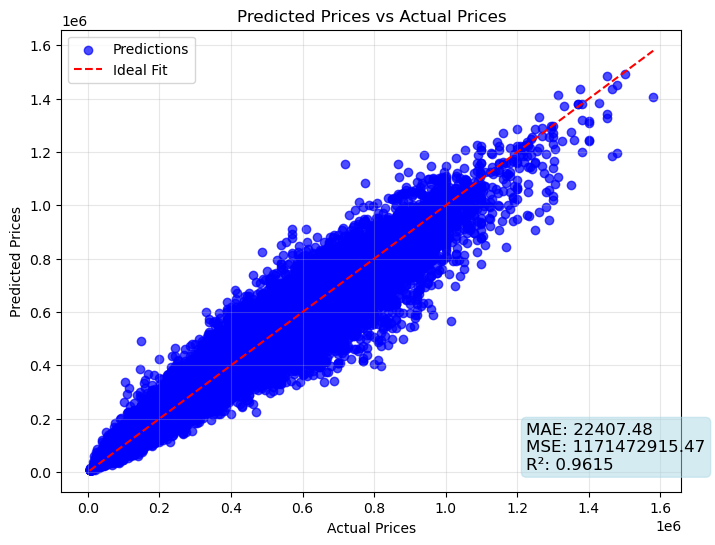

In [32]:
y_pred = best_model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')


# Add labels, title, and legend
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted Prices vs Actual Prices")
plt.legend()
plt.grid(alpha=0.3)

# Display the metrics on the plot
metrics_text = f"MAE: {mae:.2f}\nMSE: {mse:.2f}\nR²: {r2:.4f}"
plt.gca().text(0.75, 0.15, metrics_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
               bbox=dict(boxstyle="round", alpha=0.5, color="lightblue"))
# Display the plot
plt.show()


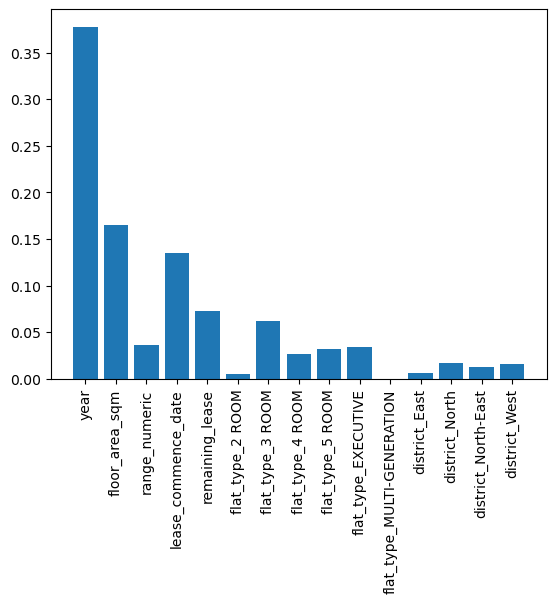

In [26]:
importance = best_model.feature_importances_
plt.bar(X.columns, importance)
plt.xticks(rotation=90)
plt.show()

In [27]:
joblib.dump(best_model, 'price_prediction_model_all.pkl')

['price_prediction_model_all.pkl']

In [34]:
model = joblib.load('price_prediction_model_all.pkl')

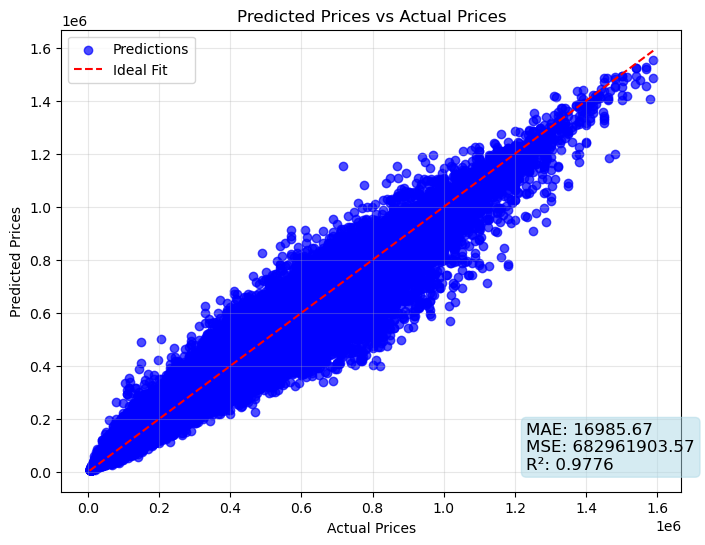

In [35]:
y_pred = best_model.predict(X)

# Metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Ideal Fit')


# Add labels, title, and legend
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted Prices vs Actual Prices")
plt.legend()
plt.grid(alpha=0.3)

# Display the metrics on the plot
metrics_text = f"MAE: {mae:.2f}\nMSE: {mse:.2f}\nR²: {r2:.4f}"
plt.gca().text(0.75, 0.15, metrics_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
               bbox=dict(boxstyle="round", alpha=0.5, color="lightblue"))
# Display the plot
plt.show()


In [38]:
# Random Forest Model with Optimized Parameters
rf_model = RandomForestRegressor(
    random_state=42,
    warm_start=True,
    oob_score=False,
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=2,
    max_samples=0.7,
    max_features='log2',
    max_depth=30,
    ccp_alpha=0.001,
    n_jobs=-1
)

# Gradient Boosting Model
xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    random_state=42
)

In [39]:
# Training Models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [40]:
# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Models
rf_mse = mean_squared_error(y_test, y_pred_rf)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
rf_r2 = r2_score(y_test, y_pred_rf)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f"Random Forest MSE: {rf_mse:.2f}, R²: {rf_r2:.2f}")
print(f"XGBoost MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}")

# Ensemble (Averaging Predictions)
ensemble_pred = (y_pred_rf + y_pred_xgb) / 2
ensemble_mse = mean_squared_error(y_test, ensemble_pred)
ensemble_r2 = r2_score(y_test, ensemble_pred)

print(f"Ensemble MSE: {ensemble_mse:.2f}, R²: {ensemble_r2:.2f}")




Random Forest MSE: 1114601694.01, R²: 0.96
XGBoost MSE: 1360333012.20, R²: 0.96
Ensemble MSE: 1162839872.76, R²: 0.96


                       Feature  Importance
0                         year    0.377557
1               floor_area_sqm    0.165442
3          lease_commence_date    0.135065
4              remaining_lease    0.073052
6             flat_type_3 ROOM    0.061852
2                range_numeric    0.036830
9          flat_type_EXECUTIVE    0.034237
8             flat_type_5 ROOM    0.031727
7             flat_type_4 ROOM    0.027130
12              district_North    0.016658
14               district_West    0.015792
13         district_North-East    0.012334
11               district_East    0.006263
5             flat_type_2 ROOM    0.005692
10  flat_type_MULTI-GENERATION    0.000367


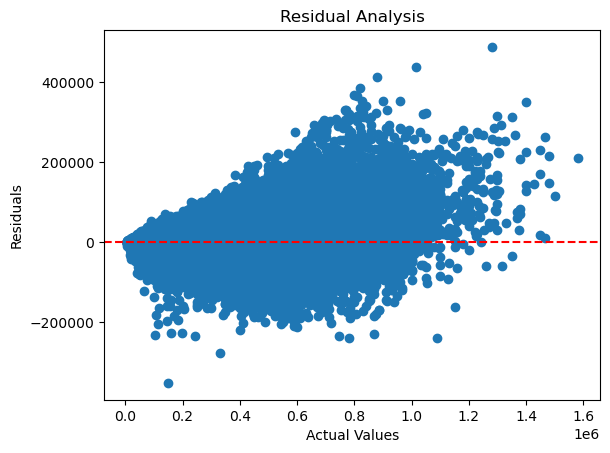

Random Forest Cross-Validation MSE: 1152820216.66
XGBoost Cross-Validation MSE: 1379337434.05


In [41]:
# Feature Importance (Random Forest)
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Residual Analysis
residuals = y_test - ensemble_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()

# Cross-Validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

print(f"Random Forest Cross-Validation MSE: {-np.mean(cv_scores_rf):.2f}")
print(f"XGBoost Cross-Validation MSE: {-np.mean(cv_scores_xgb):.2f}")

In [51]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

def objective(trial):
    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.15),  # Focus around best trial, slightly wider
        'n_estimators': trial.suggest_int('n_estimators', 400, 600),         # Focus around best trial, wider range
        'max_depth': trial.suggest_int('max_depth', 8, 12),                   # Expanded depth range to include nearby values
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),              # A tighter range around the best trial
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.9, 1.0), # Focus around the best trial
        'min_child_weight': trial.suggest_int('min_child_weight', 5, 12),      # Slightly expanded range from the best trial
        'reg_alpha': trial.suggest_float('reg_alpha', 0.03, 0.1),             # A wider range than the best trial
        'reg_lambda': trial.suggest_float('reg_lambda', 2.5, 4.5),            # A tighter range around the best trial
    }

    model = XGBRegressor(**param, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Run the optimization with the updated parameter search space
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)  # Increased number of trials to explore more options

print("Best Trial:", study.best_trial.params)


[I 2025-01-02 23:13:36,950] A new study created in memory with name: no-name-ac203adb-c977-4362-9fa4-d127ab5ea4c5
[I 2025-01-02 23:13:51,043] Trial 0 finished with value: 1048632940.2197137 and parameters: {'learning_rate': 0.05596832673731832, 'n_estimators': 457, 'max_depth': 9, 'subsample': 0.8187560426508718, 'colsample_bytree': 0.9158531270375503, 'min_child_weight': 8, 'reg_alpha': 0.03446318717647653, 'reg_lambda': 2.8288671409502997}. Best is trial 0 with value: 1048632940.2197137.
[I 2025-01-02 23:14:10,612] Trial 1 finished with value: 987869997.6915619 and parameters: {'learning_rate': 0.13706486005607027, 'n_estimators': 485, 'max_depth': 12, 'subsample': 0.9042715528283298, 'colsample_bytree': 0.9347477948872798, 'min_child_weight': 10, 'reg_alpha': 0.08794075314359742, 'reg_lambda': 2.7174495520959}. Best is trial 1 with value: 987869997.6915619.
[I 2025-01-02 23:14:26,886] Trial 2 finished with value: 984130668.1279863 and parameters: {'learning_rate': 0.1331717344745424

Best Trial: {'learning_rate': 0.10087761346626611, 'n_estimators': 590, 'max_depth': 11, 'subsample': 0.9958183955552087, 'colsample_bytree': 0.9955580767322605, 'min_child_weight': 5, 'reg_alpha': 0.07393758236869877, 'reg_lambda': 3.6904532645035695}


In [52]:
# Gradient Boosting Model
xgb_model = XGBRegressor(
    learning_rate= 0.10087761346626611, 
    n_estimators= 590, 
    max_depth= 11,
    subsample = 0.9958183955552087,
    colsample_bytree= 0.9955580767322605,
    min_child_weight= 5,
    reg_alpha= 0.07393758236869877,
    reg_lambda= 3.6904532645035695
)

In [53]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9955580767322605, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.10087761346626611, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=590, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

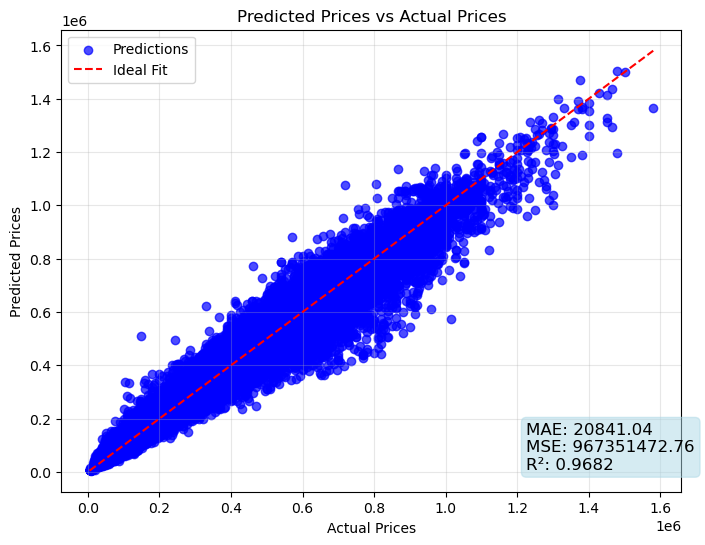

In [54]:
y_pred = xgb_model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')


# Add labels, title, and legend
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted Prices vs Actual Prices")
plt.legend()
plt.grid(alpha=0.3)

# Display the metrics on the plot
metrics_text = f"MAE: {mae:.2f}\nMSE: {mse:.2f}\nR²: {r2:.4f}"
plt.gca().text(0.75, 0.15, metrics_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
               bbox=dict(boxstyle="round", alpha=0.5, color="lightblue"))
# Display the plot
plt.show()


In [55]:
joblib.dump(xgb_model, 'price_prediction_model_xgb.pkl')

['price_prediction_model_xgb.pkl']